<div align="center">

#   Introdução à óptica não-linear

**Autor.** Carlos Antunis Bonfim da Silva Santos

</div>

In [1]:
using GLMakie;
using FFTW;
const mech = include("src/mechanics.jl");

<div align="center">

##  Oscilações

</div>

In [2]:
ω_0 = 1.;
T = 2π / ω_0;

dt = 0.1;

ts = dt:dt:5T;

<div align="center">

###  Osciladores harmônicos

</div>

In [3]:
Δx = 2.;
v_0 = 0.;

Φ = mech.harmonicOscillator(Δx, v_0, ω_0);

fig = Figure(size = (1600, 600));
ax = Axis(fig[1, 1], xlabel = "x", ylabel = "y", limits = ((-3, +3), (-2.5, +2.5)));

Points = [(Φ.x, 0)];
xs = [(0., Φ.x)];

trajectory = lines!(ax, Points, color = :gray, linestyle = :dash);
point = scatter!(ax, [(Φ.x, 0)], markersize = 15, color = :black);

display(fig);
record(fig, "assets/lecture-1/harmonic-oscillator.gif", ts; framerate=15) do t
    global Φ, Points;
    mech.evolve(Φ, dt);

    push!(Points, (Φ.x, 0))
    push!(xs, (t, Φ.x))

    if length(Points) > 15
        popfirst!(Points);
    end

    trajectory[1][] = Points;
    point[1][] = [(Φ.x, 0)];

    display(fig);
end;

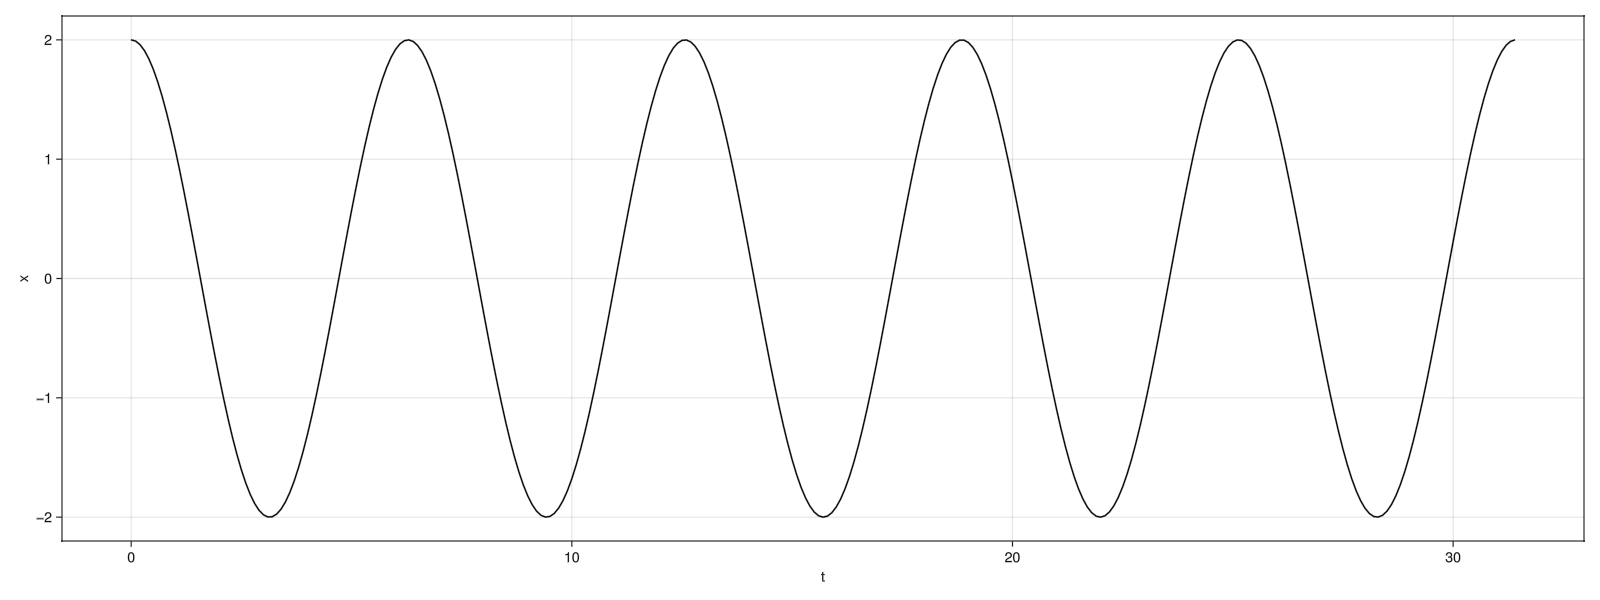

In [4]:
fig = Figure(size = (1600, 600));
ax = Axis(fig[1, 1], xlabel = "t", ylabel = "x");

line = lines!(ax, xs, color = :black);

save("assets/lecture-1/harmonic-oscillator.png", fig);
display("image/png", read("assets/lecture-1/harmonic-oscillator.png"));

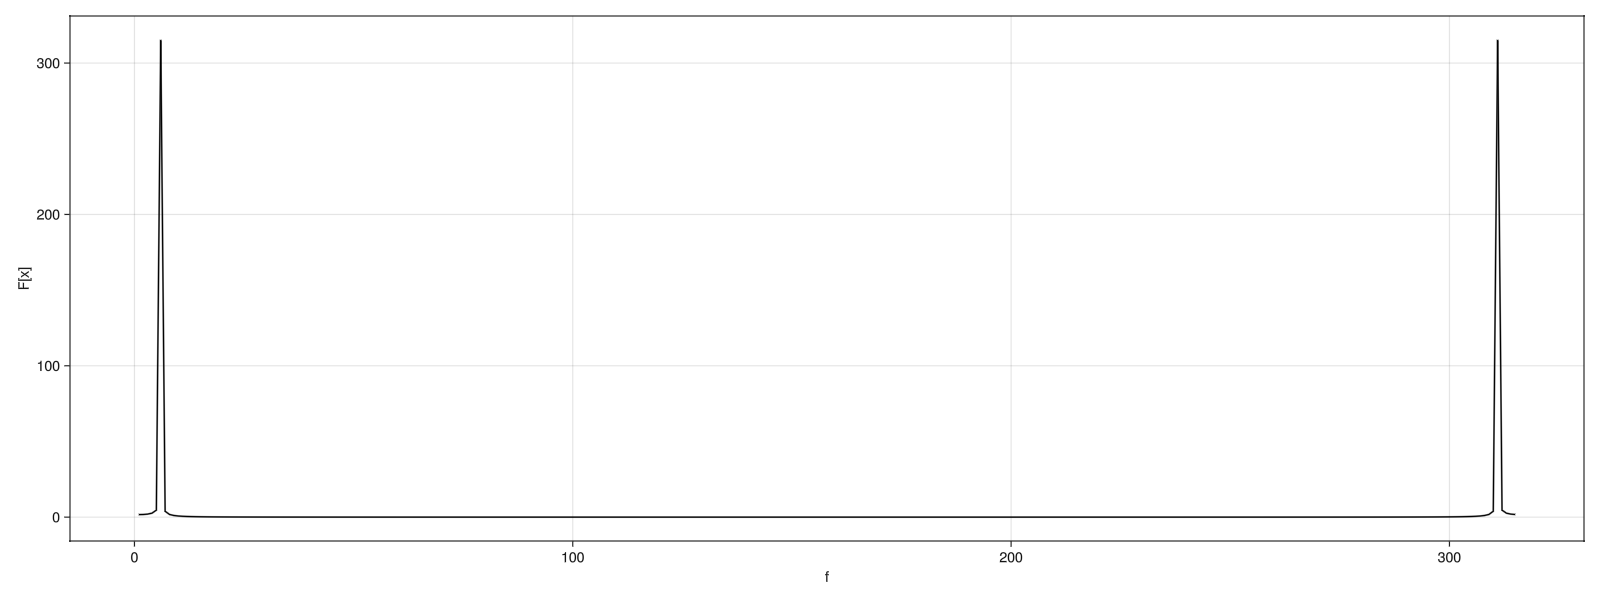

In [5]:
fig = Figure(size = (1600, 600));
ax = Axis(fig[1, 1], xlabel = "f", ylabel = "F[x]");

f = abs.(fft([p[2] for p in xs]));

line = lines!(ax, f, color = :black);

save("assets/lecture-1/harmonic-oscillator-ft.png", fig);
display("image/png", read("assets/lecture-1/harmonic-oscillator-ft.png"));

<div align="center">

###  Osciladores amortecidos

</div>

<div align="center">

####  Regime subamortecido

</div>

In [6]:
Δx = 2.;
v_0 = 0.;
ζ = 0.5;

Φ = mech.dampedHarmonicOscillator(Δx, v_0, ω_0, ζ);

fig = Figure(size = (1600, 600));
ax = Axis(fig[1, 1], xlabel = "x", ylabel = "y", limits = ((-3, +3), (-2.5, +2.5)));

Points = [(Φ.x, 0)];
xs = [(0., Φ.x)];

trajectory = lines!(ax, Points, color = :gray, linestyle = :dash);
point = scatter!(ax, [(Φ.x, 0)], markersize = 15, color = :black);

display(fig);
record(fig, "assets/lecture-1/underdamped-harmonic-oscillator.gif", ts; framerate=15) do t
    global Φ, Points;
    mech.evolve(Φ, dt);

    push!(Points, (Φ.x, 0))
    push!(xs, (t, Φ.x))

    if length(Points) > 15
        popfirst!(Points);
    end

    trajectory[1][] = Points;
    point[1][] = [(Φ.x, 0)];

    display(fig);
end;

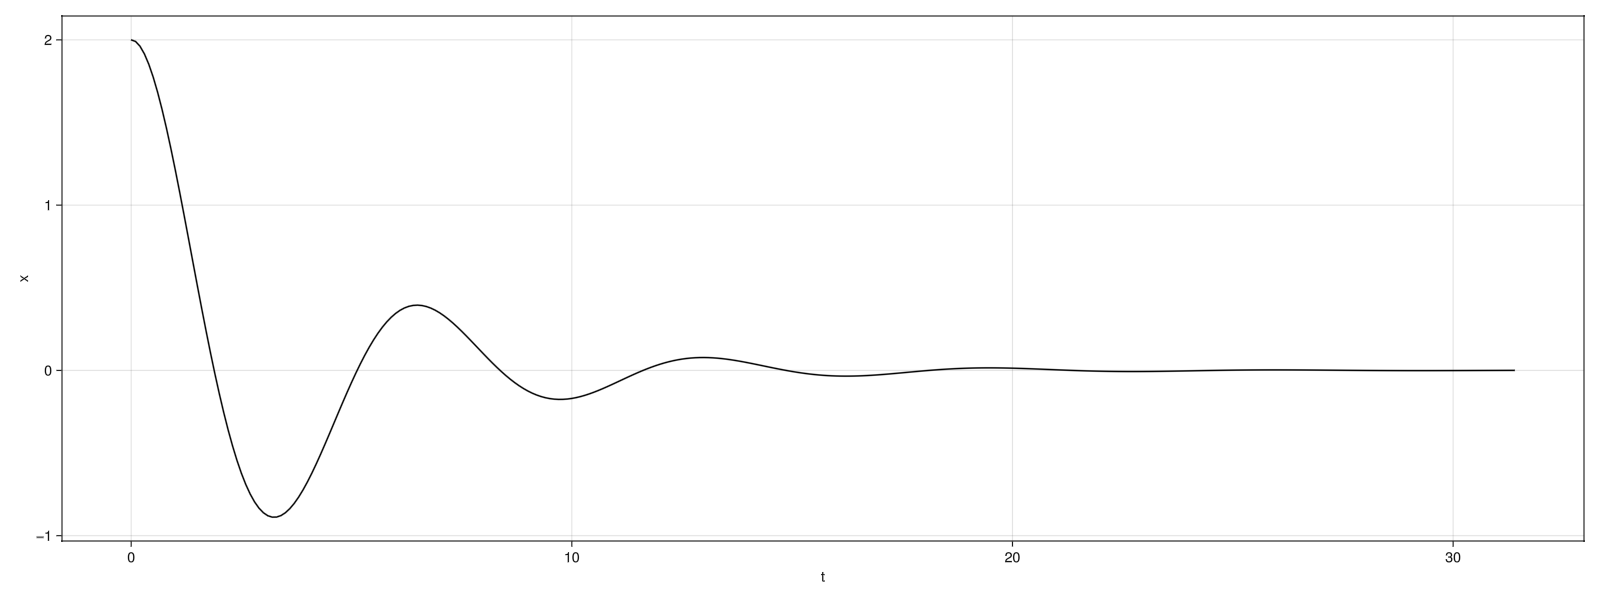

In [7]:
fig = Figure(size = (1600, 600));
ax = Axis(fig[1, 1], xlabel = "t", ylabel = "x");

line = lines!(ax, xs, color = :black);

save("assets/lecture-1/underdamped-harmonic-oscillator.png", fig);
display("image/png", read("assets/lecture-1/underdamped-harmonic-oscillator.png"));

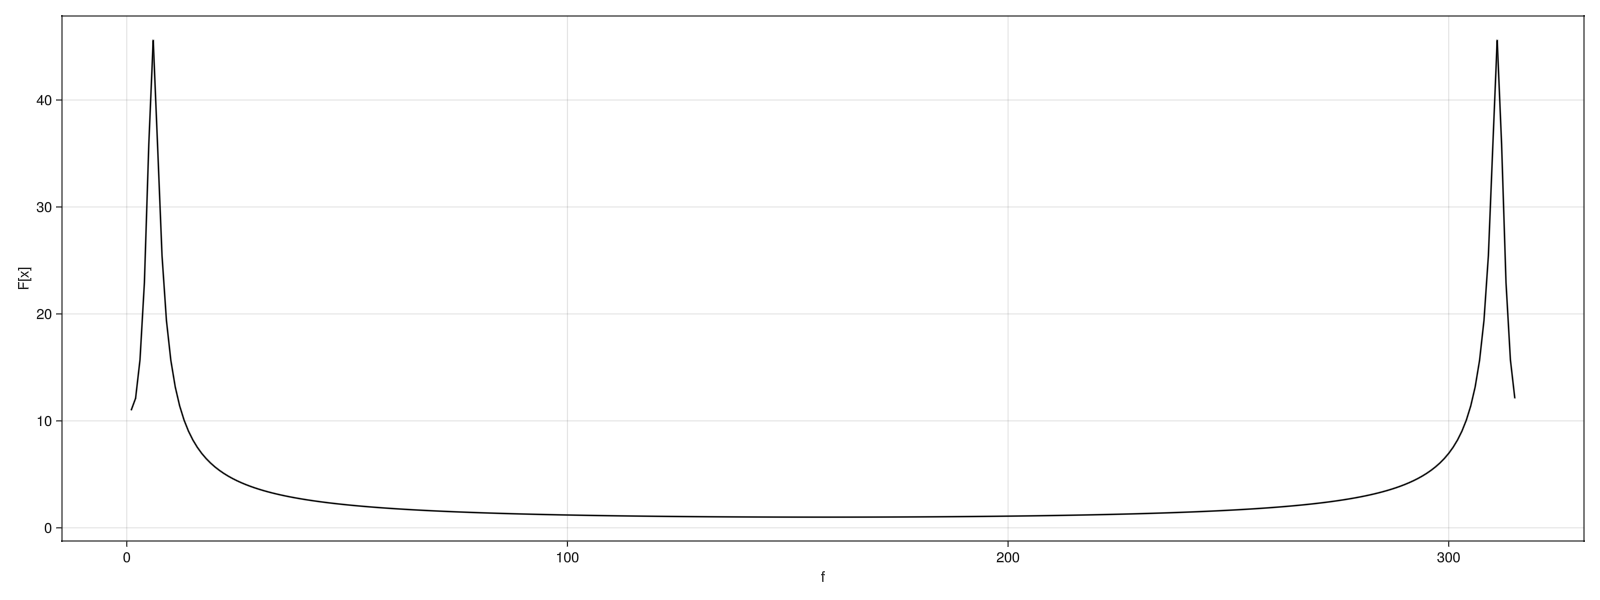

In [8]:
fig = Figure(size = (1600, 600));
ax = Axis(fig[1, 1], xlabel = "f", ylabel = "F[x]");

f = abs.(fft([p[2] for p in xs]));

line = lines!(ax, f, color = :black);

save("assets/lecture-1/underdamped-harmonic-oscillator-ft.png", fig);
display("image/png", read("assets/lecture-1/underdamped-harmonic-oscillator-ft.png"));

<div align="center">

####  Regime criticamente amortecido

</div>

In [9]:
Δx = 2.;
v_0 = 0.;
ζ = ω_0;

Φ = mech.dampedHarmonicOscillator(Δx, v_0, ω_0, ζ);

fig = Figure(size = (1600, 600));
ax = Axis(fig[1, 1], xlabel = "x", ylabel = "y", limits = ((-3, +3), (-2.5, +2.5)));

Points = [(Φ.x, 0)];
xs = [(0., Φ.x)];

trajectory = lines!(ax, Points, color = :gray, linestyle = :dash);
point = scatter!(ax, [(Φ.x, 0)], markersize = 15, color = :black);

display(fig);
record(fig, "assets/lecture-1/critically-damped-harmonic-oscillator.gif", ts; framerate=15) do t
    global Φ, Points;
    mech.evolve(Φ, dt);

    push!(Points, (Φ.x, 0))
    push!(xs, (t, Φ.x))

    if length(Points) > 15
        popfirst!(Points);
    end

    trajectory[1][] = Points;
    point[1][] = [(Φ.x, 0)];

    display(fig);
end;

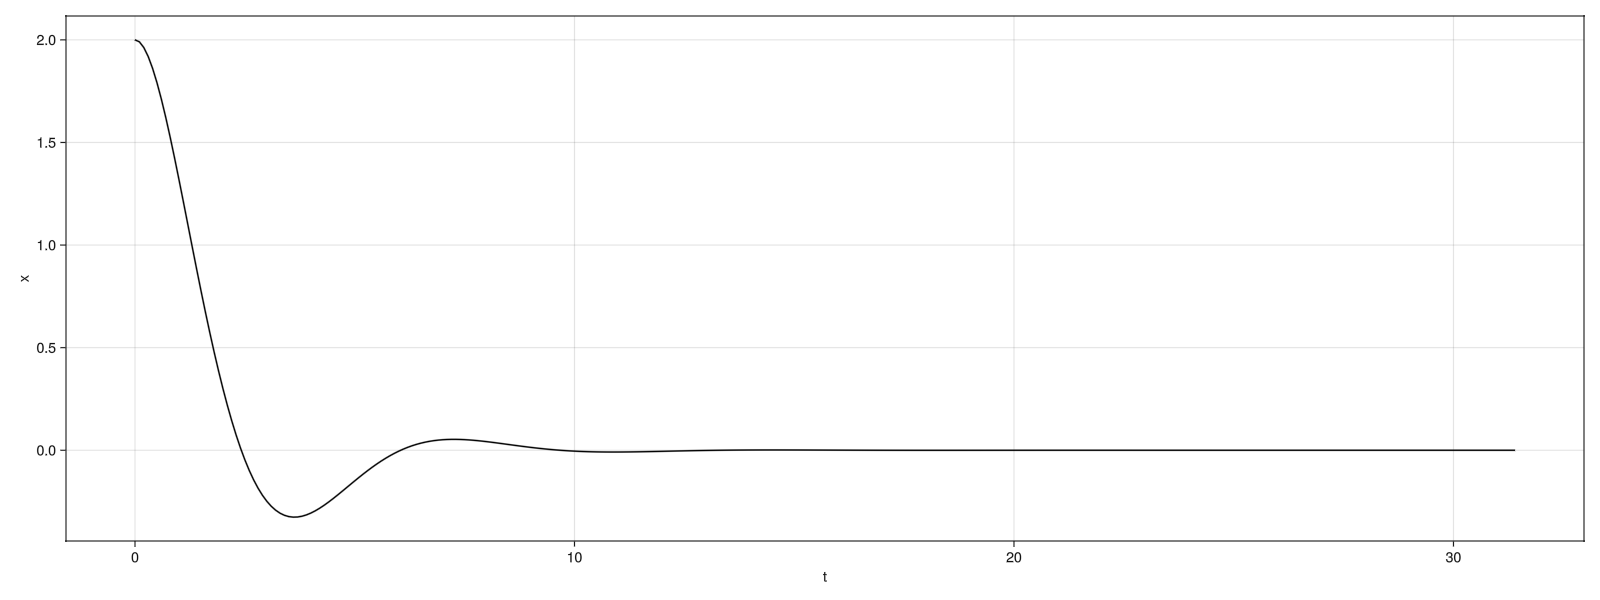

In [10]:
fig = Figure(size = (1600, 600));
ax = Axis(fig[1, 1], xlabel = "t", ylabel = "x");

line = lines!(ax, xs, color = :black);

save("assets/lecture-1/critically-damped-harmonic-oscillator.png", fig);
display("image/png", read("assets/lecture-1/critically-damped-harmonic-oscillator.png"));

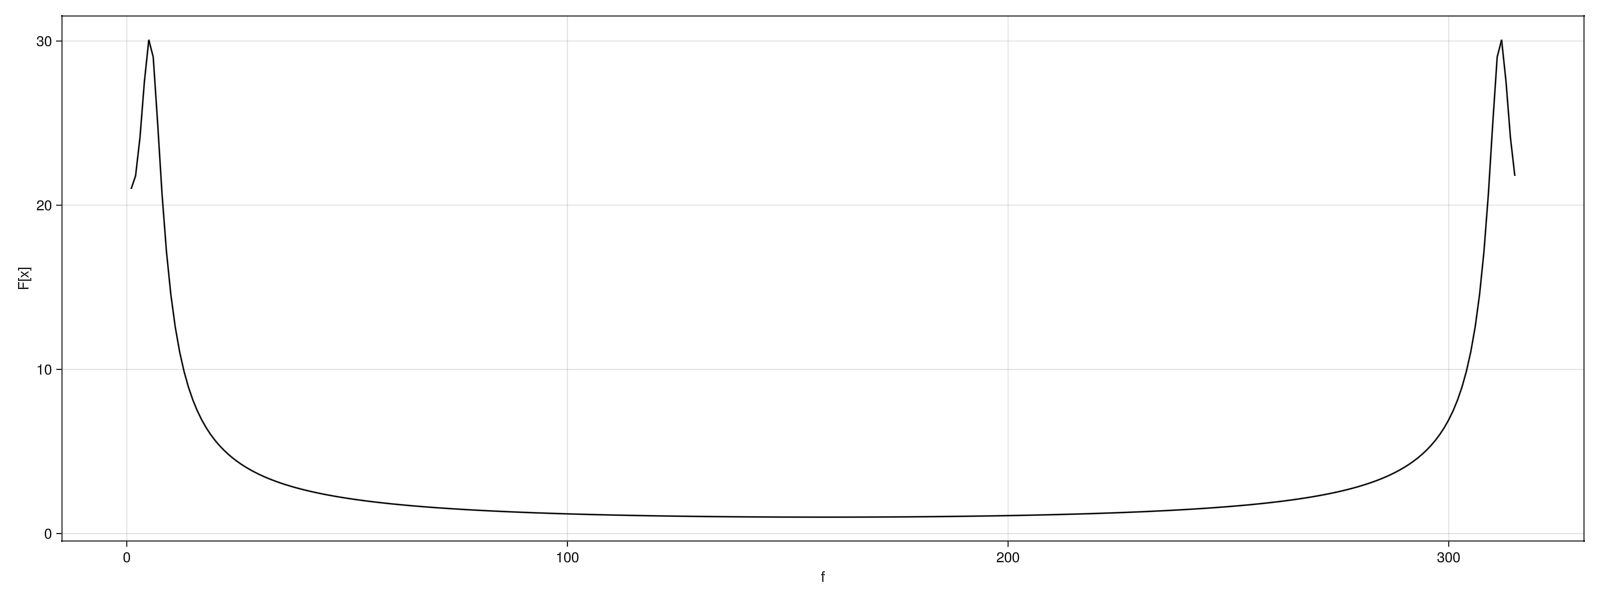

In [11]:
fig = Figure(size = (1600, 600));
ax = Axis(fig[1, 1], xlabel = "f", ylabel = "F[x]");

f = abs.(fft([p[2] for p in xs]));

line = lines!(ax, f, color = :black);

save("assets/lecture-1/critically-damped-harmonic-oscillator-ft.png", fig);
display("image/png", read("assets/lecture-1/critically-damped-harmonic-oscillator-ft.png"));

<div align="center">

####  Regime superamortecido

</div>

In [12]:
Δx = 2.;
v_0 = 0.;
ζ = 3.5;

Φ = mech.dampedHarmonicOscillator(Δx, v_0, ω_0, ζ);

fig = Figure(size = (1600, 600));
ax = Axis(fig[1, 1], xlabel = "x", ylabel = "y", limits = ((-3, +3), (-2.5, +2.5)));

Points = [(Φ.x, 0)];
xs = [(0., Φ.x)];

trajectory = lines!(ax, Points, color = :gray, linestyle = :dash);
point = scatter!(ax, [(Φ.x, 0)], markersize = 15, color = :black);

display(fig);
record(fig, "assets/lecture-1/overdamped-harmonic-oscillator.gif", ts; framerate=15) do t
    global Φ, Points;
    mech.evolve(Φ, dt);

    push!(Points, (Φ.x, 0));
    push!(xs, (t, Φ.x));

    if length(Points) > 15
        popfirst!(Points);
    end

    trajectory[1][] = Points;
    point[1][] = [(Φ.x, 0)];

    display(fig);
end;

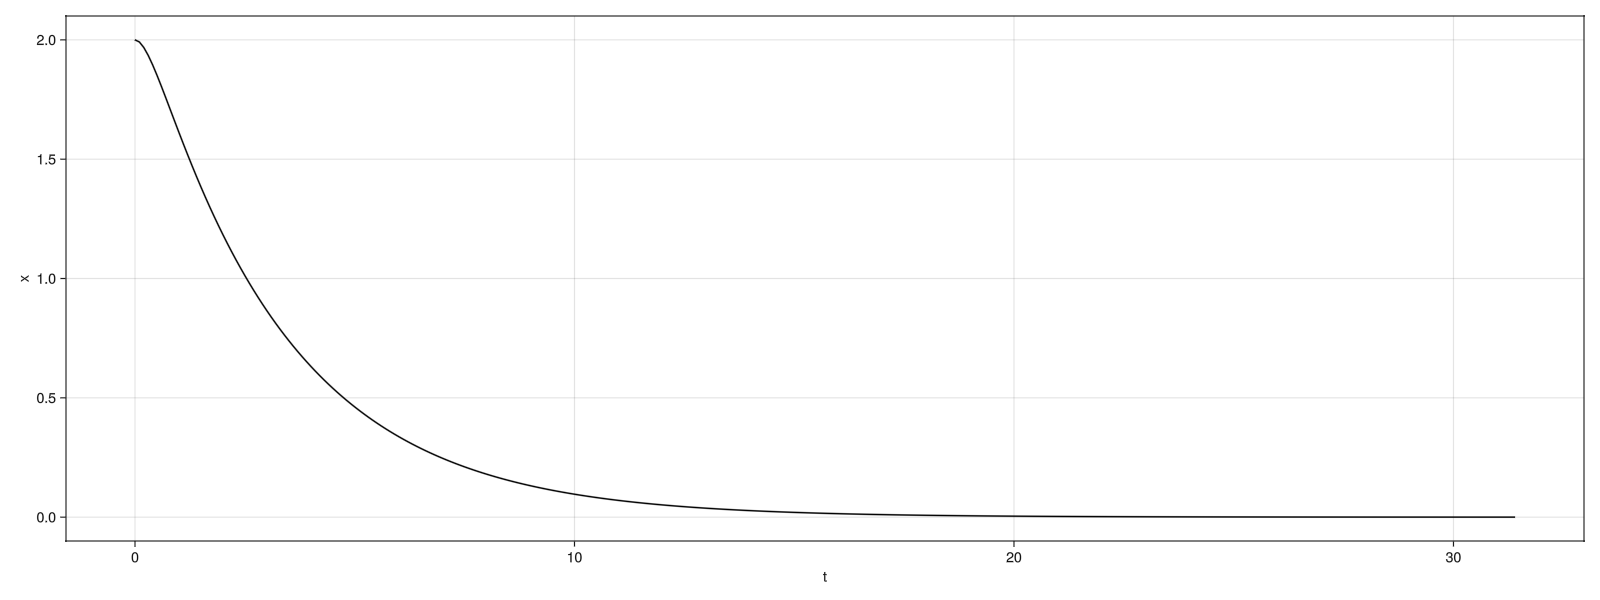

In [13]:
fig = Figure(size = (1600, 600));
ax = Axis(fig[1, 1], xlabel = "t", ylabel = "x");

line = lines!(ax, xs, color = :black);

save("assets/lecture-1/overdamped-harmonic-oscillator.png", fig);
display("image/png", read("assets/lecture-1/overdamped-harmonic-oscillator.png"));

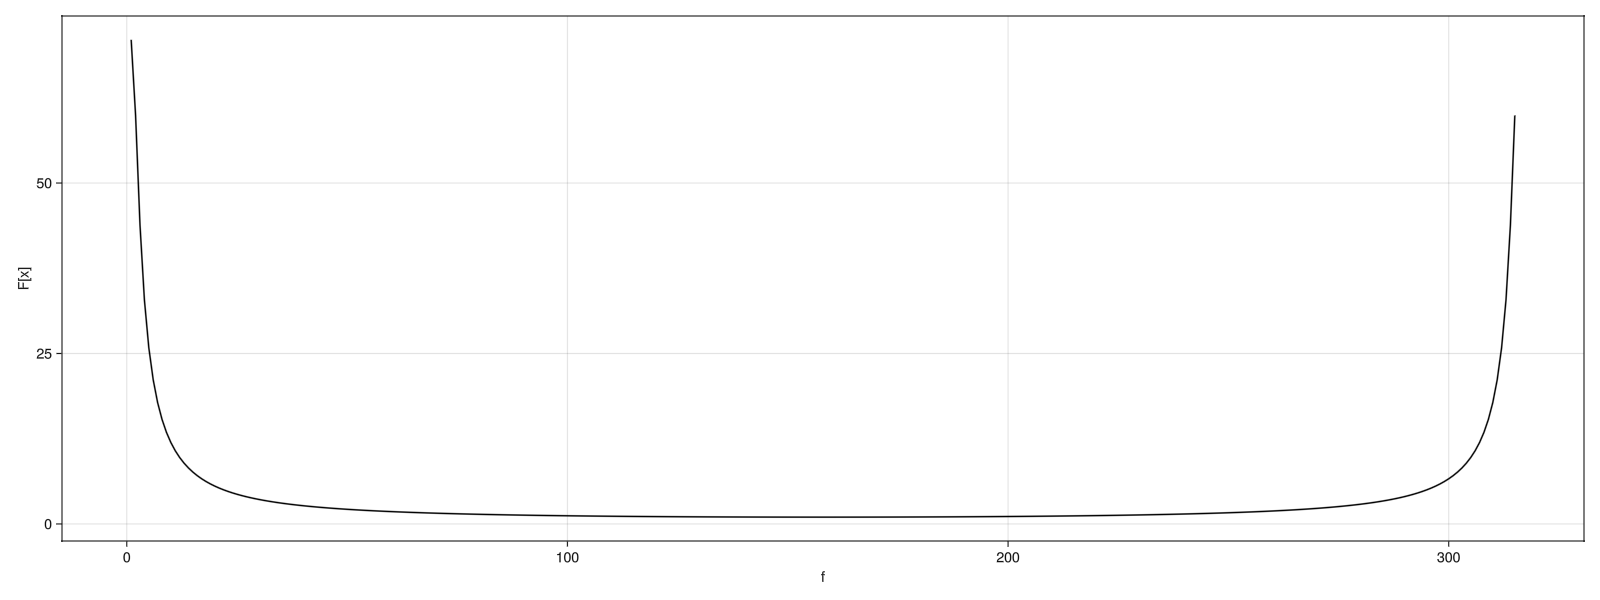

In [14]:
fig = Figure(size = (1600, 600));
ax = Axis(fig[1, 1], xlabel = "f", ylabel = "F[x]");

f = abs.(fft([p[2] for p in xs]));

line = lines!(ax, f, color = :black);

save("assets/lecture-1/overdamped-harmonic-oscillator-ft.png", fig);
display("image/png", read("assets/lecture-1/overdamped-harmonic-oscillator-ft.png"));

<div align="center">

###  Osciladores forçados

</div>

In [15]:
Δx = 0.;
v_0 = 0.;
ζ = 2.5;

E_0 = 4.;
ω_d = 2.5;
drivingField = t -> E_0 * (cos(ω_d * t) + cos(ω_d * t));

Φ = mech.drivenHarmonicOscillator(Δx, v_0, ω_0, ζ, drivingField);

fig = Figure(size = (1600, 600));
ax = Axis(fig[1, 1], xlabel = "x", ylabel = "y", limits = ((-3, +3), (-2.5, +2.5)));

Points = [(Φ.x, 0)];
xs = [(0., Φ.x)];

trajectory = lines!(ax, Points, color = :gray, linestyle = :dash);
point = scatter!(ax, [(Φ.x, 0)], markersize = 15, color = :black);

display(fig);
record(fig, "assets/lecture-1/driven-harmonic-oscillator.gif", ts; framerate=15) do t
    global Φ, Points;
    mech.evolve(Φ, dt);

    push!(Points, (Φ.x, 0));
    push!(xs, (t, Φ.x));

    if length(Points) > 15
        popfirst!(Points);
    end

    trajectory[1][] = Points;
    point[1][] = [(Φ.x, 0)];

    display(fig);
end;

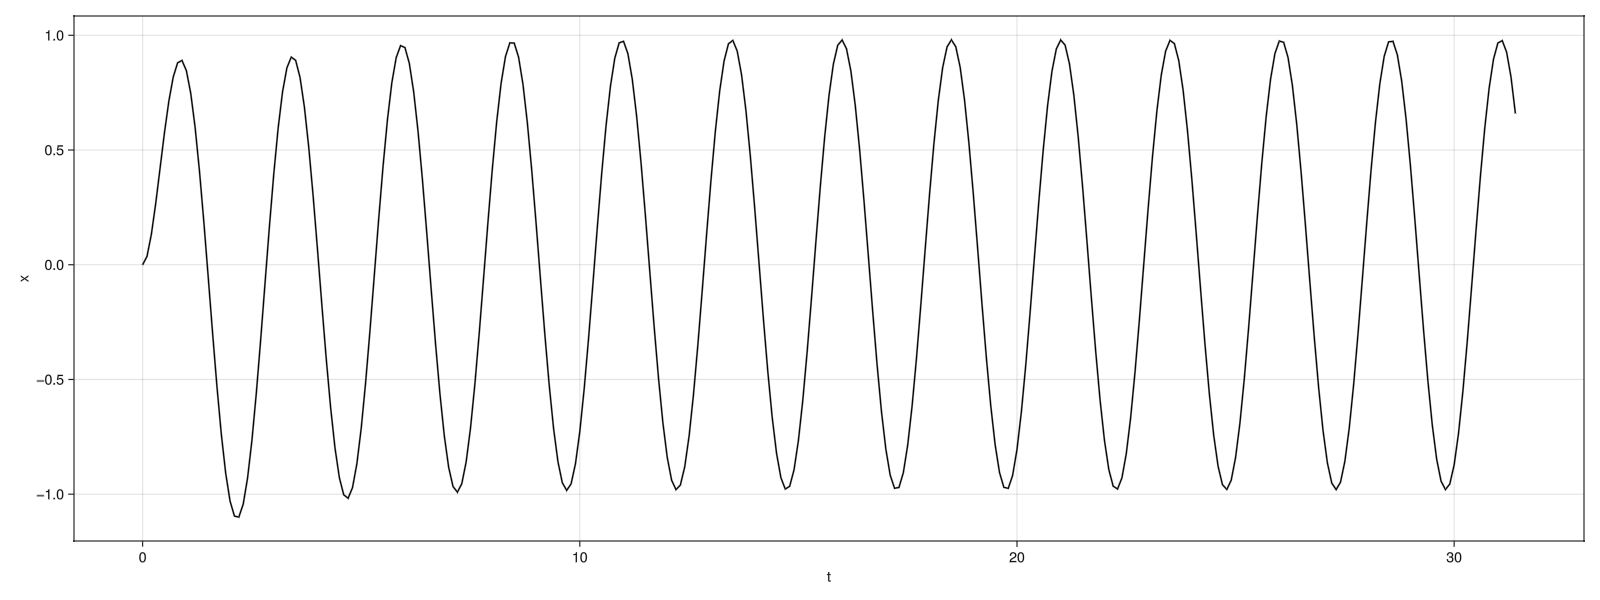

In [16]:
fig = Figure(size = (1600, 600));
ax = Axis(fig[1, 1], xlabel = "t", ylabel = "x");

line = lines!(ax, xs, color = :black);

save("assets/lecture-1/driven-harmonic-oscillator.png", fig);
display("image/png", read("assets/lecture-1/driven-harmonic-oscillator.png"));

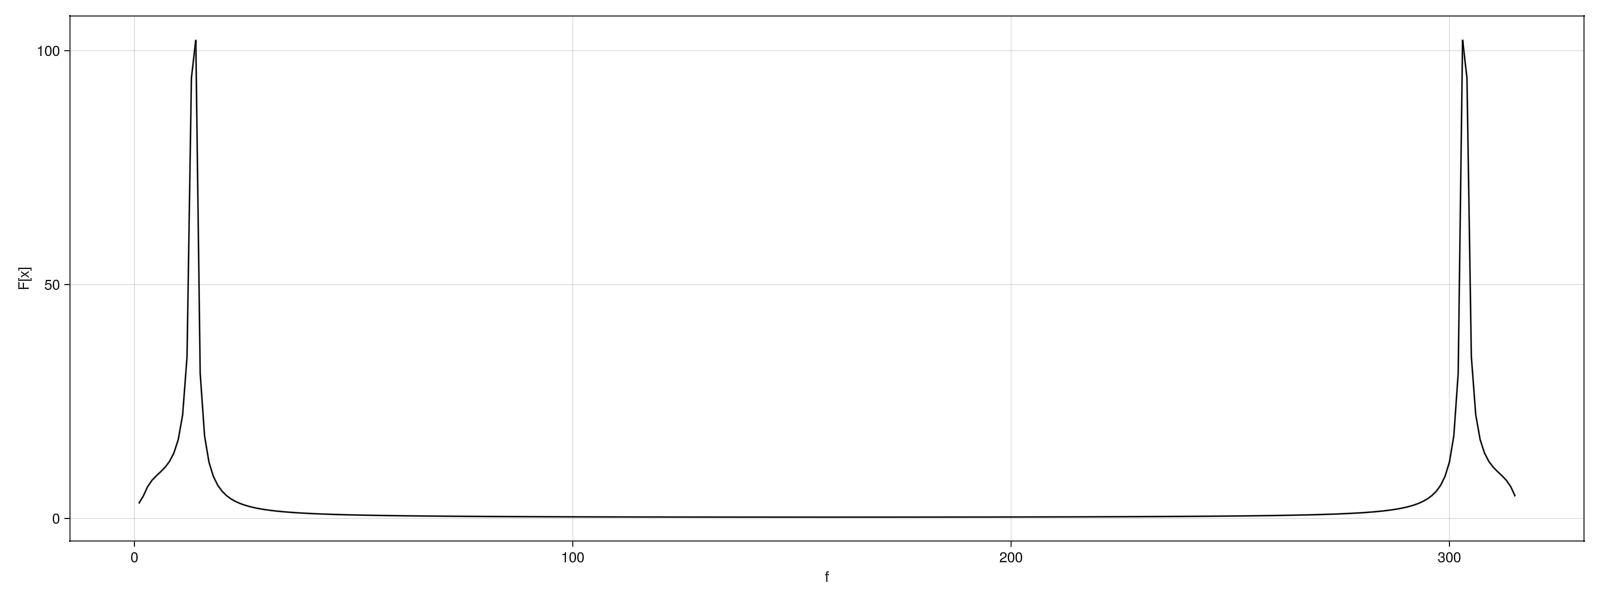

In [17]:
fig = Figure(size = (1600, 600));
ax = Axis(fig[1, 1], xlabel = "f", ylabel = "F[x]");

f = abs.(fft([p[2] for p in xs]));

line = lines!(ax, f, color = :black);

save("assets/lecture-1/driven-harmonic-oscillator-ft.png", fig);
display("image/png", read("assets/lecture-1/driven-harmonic-oscillator-ft.png"));

<div align="center">

###  Osciladores não-linear forçados

</div>

In [18]:
Δx = 0.;
v_0 = 0.;
ζ = 2.5;

E_0 = 4.;
ω_d = 2.5;
drivingField = t -> E_0 * (cos(ω_d * t) + cos(ω_d * t));

ξ_2 = .75;
nonlinearOscillation = x -> ξ_2 * x^2;

Φ = mech.anharmonicOscillator(Δx, v_0, ω_0, ζ, drivingField, nonlinearOscillation);

fig = Figure(size=(1600, 600));
ax = Axis(fig[1, 1], xlabel="x", ylabel="y", limits=((-3, +3), (-2.5, +2.5)));

Points = [(Φ.x, 0)];
xs = [(0., Φ.x)];

trajectory = lines!(ax, Points, color=:gray, linestyle=:dash);
point = scatter!(ax, [(Φ.x, 0)], markersize=15, color=:black);

display(fig);
record(fig, "assets/lecture-1/anharmonic-oscillator.gif", ts; framerate=15) do t
    global Φ, Points
    mech.evolve(Φ, dt)

    push!(Points, (Φ.x, 0))
    push!(xs, (t, Φ.x))

    if length(Points) > 15
        popfirst!(Points)
    end

    trajectory[1][] = Points
    point[1][] = [(Φ.x, 0)]

    display(fig)
end;

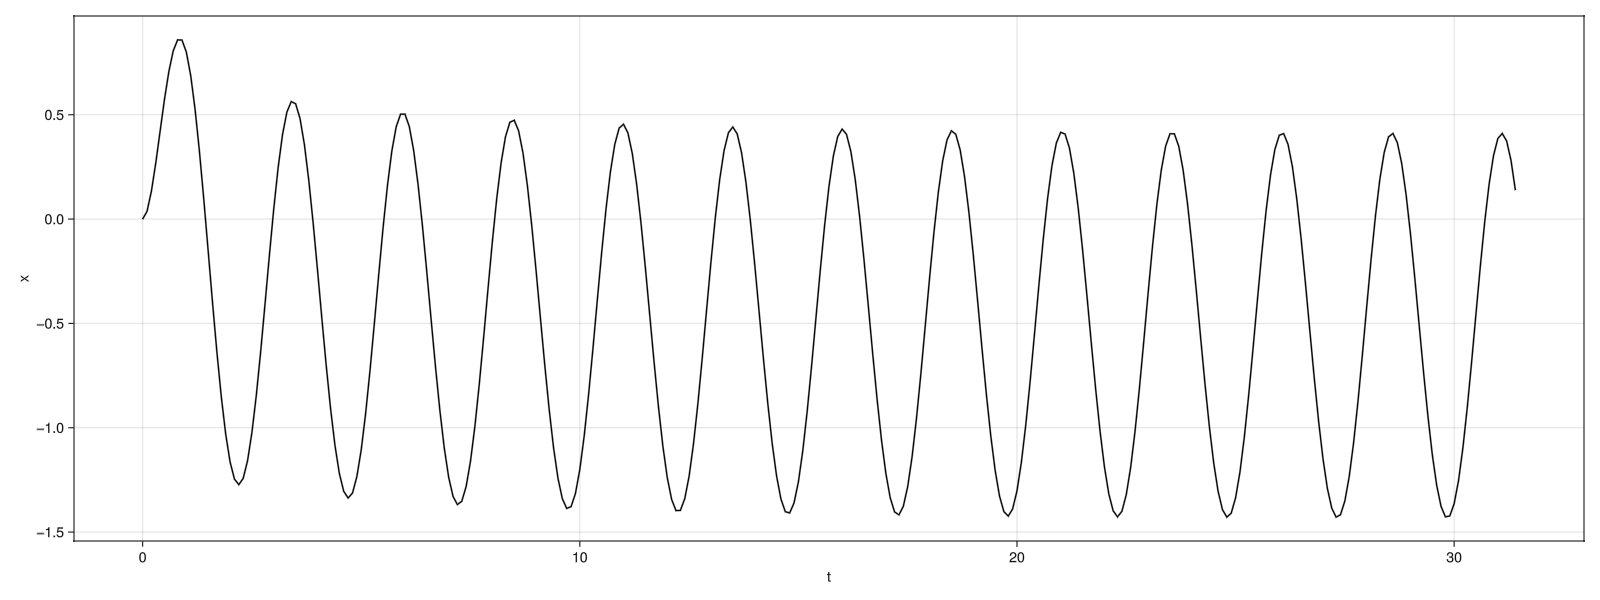

In [19]:
fig = Figure(size = (1600, 600));
ax = Axis(fig[1, 1], xlabel = "t", ylabel = "x");

line = lines!(ax, xs, color=:black);

save("assets/lecture-1/anharmonic-oscillator.png", fig);
display("image/png", read("assets/lecture-1/anharmonic-oscillator.png"));

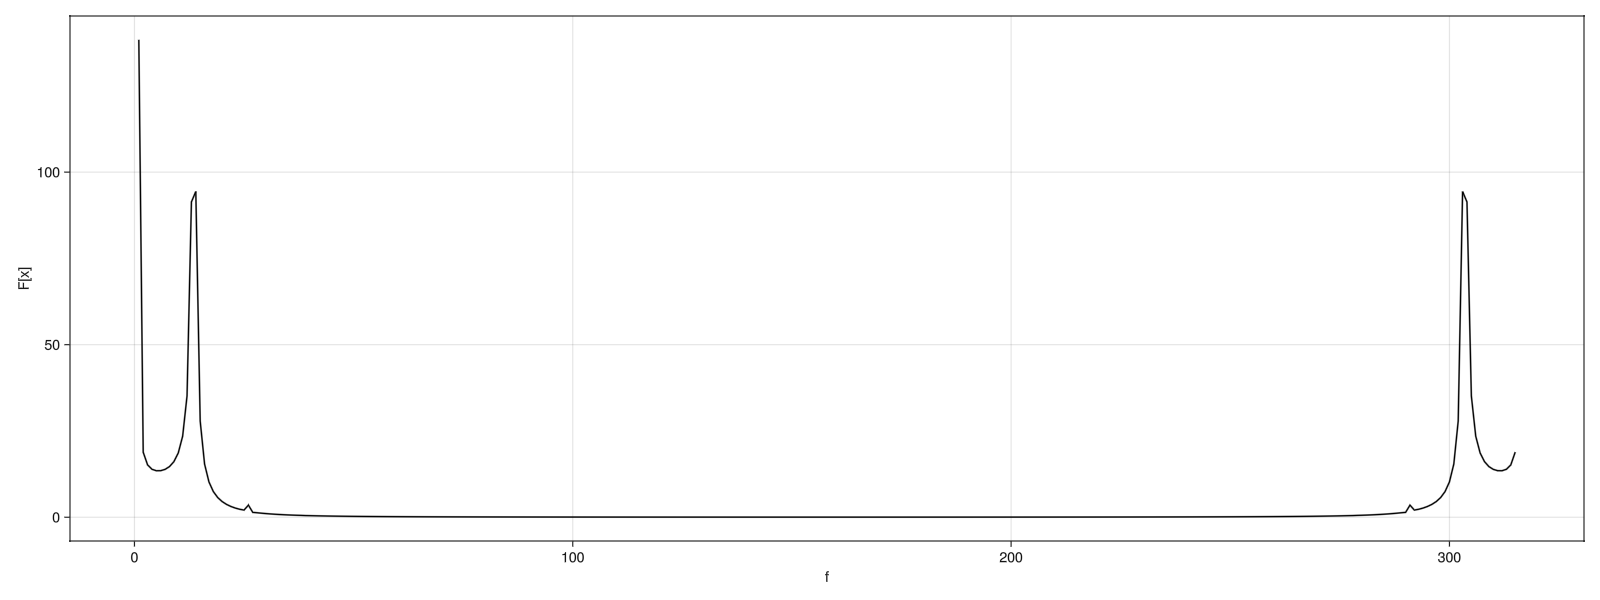

In [20]:
fig = Figure(size = (1600, 600));
ax = Axis(fig[1, 1], xlabel = "f", ylabel = "F[x]");

f = abs.(fft([p[2] for p in xs]));

line = lines!(ax, f, color = :black);

save("assets/lecture-1/anharmonic-oscillator-ft.png", fig);
display("image/png", read("assets/lecture-1/anharmonic-oscillator-ft.png"));